## Project Statement

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company. 

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.


## Gathering data

This document explores the Ford GoBike's trip data for public containing data from 2017-04/2019 for 325K bike rides.

In [132]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import glob
import os

%matplotlib inline

In [133]:
path =r'C:\Anam Documents\Data Analyst nanodegree\Projects\Project 7 communicate data findings\ford_data_2017_2019'

In [134]:
all_files = glob.glob(os.path.join(path, "*.csv"))

In [135]:
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index = True)

C:\Users\Anam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [136]:
df.to_csv('master_file.csv', index=False)

## Accessing Data

In [137]:
df.head()

bike_id bike_share_for_all_trip  duration_sec  end_station_id  \
0       96                     NaN         80110            43.0   
1       88                     NaN         78800            96.0   
2     1094                     NaN         45768           245.0   
3     2831                     NaN         62172             5.0   
4     3167                     NaN         43603           247.0   

   end_station_latitude  end_station_longitude  \
0             37.778768            -122.415929   
1             37.766210            -122.426614   
2             37.870348            -122.267764   
3             37.783899            -122.408445   
4             37.867789            -122.265896   

                                    end_station_name  \
0  San Francisco Public Library (Grove St at Hyde...   
1                              Dolores St at 15th St   
2                             Downtown Berkeley BART   
3       Powell St BART Station (Market St at 5th St)   
4                          Fulton St at Bancroft Way   

                   end_time  member_birth_year member_gender  \
0  2018-01-01 15:12:50.2450             1987.0          Male   
1  2018-01-01 13:49:55.6170             1965.0        Female   
2  2018-01-01 11:28:36.8830                NaN           NaN   
3  2018-01-01 10:47:23.5310                NaN           NaN   
4  2018-01-01 02:29:57.5710             1997.0        Female   

   start_station_id  start_station_latitude  start_station_longitude  \
0              74.0               37.776435              -122.426244   
1             284.0               37.784872              -122.400876   
2             245.0               37.870348              -122.267764   
3              60.0               37.774520              -122.409449   
4             239.0               37.868813              -122.258764   

                                  start_station_name  \
0                              Laguna St at Hayes St   
1  Yerba Buena Center for the Arts (Howard St at ...   
2                             Downtown Berkeley BART   
3                               8th St at Ringold St   
4                      Bancroft Way at Telegraph Ave   

                 start_time   user_type  
0  2017-12-31 16:57:39.6540    Customer  
1  2017-12-31 15:56:34.8420    Customer  
2  2017-12-31 22:45:48.4110    Customer  
3  2017-12-31 17:31:10.6360    Customer  
4  2017-12-31 14:23:14.0010  Subscriber

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3254325 entries, 0 to 3254324
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(7)
memory usage: 397.3+ MB


In [139]:
df.describe()

bike_id  duration_sec  end_station_id  end_station_latitude  \
count  3.254325e+06  3.254325e+06    3.241824e+06          3.254325e+06   
mean   2.729018e+03  8.743223e+02    1.191966e+02          3.776874e+01   
std    1.724443e+03  2.468547e+03    1.029334e+02          1.342571e-01   
min    1.000000e+01  6.100000e+01    3.000000e+00          0.000000e+00   
25%    1.336000e+03  3.510000e+02    3.000000e+01          3.777143e+01   
50%    2.579000e+03  5.570000e+02    8.700000e+01          3.778127e+01   
75%    3.821000e+03  8.730000e+02    1.860000e+02          3.779625e+01   
max    7.108000e+03  8.636900e+04    4.200000e+02          4.551000e+01   

       end_station_longitude  member_birth_year  start_station_id  \
count           3.254325e+06       3.036159e+06      3.241824e+06   
mean           -1.223519e+02       1.983137e+03      1.209191e+02   
std             3.220803e-01       1.043760e+01      1.030184e+02   
min            -1.224737e+02       1.878000e+03      3.000000e+00   
25%            -1.224108e+02       1.978000e+03      3.100000e+01   
50%            -1.223974e+02       1.985000e+03      8.800000e+01   
75%            -1.222935e+02       1.991000e+03      1.880000e+02   
max             0.000000e+00       2.001000e+03      4.200000e+02   

       start_station_latitude  start_station_longitude  
count            3.254325e+06             3.254325e+06  
mean             3.776880e+01            -1.223530e+02  
std              1.029275e-01             1.601559e-01  
min              0.000000e+00            -1.224737e+02  
25%              3.777106e+01            -1.224117e+02  
50%              3.778107e+01            -1.223983e+02  
75%              3.779539e+01            -1.222934e+02  
max              4.551000e+01             0.000000e+00

In [140]:
# Visually check 50 random records
df.sample(50)

bike_id bike_share_for_all_trip  duration_sec  end_station_id  \
873524      1926                      No          1412           130.0   
2545630     5232                      No           461            26.0   
264792      3195                     NaN           617            11.0   
1551998     1779                      No           271           115.0   
1818592     4395                      No           434            30.0   
450491      1399                     NaN          1254           309.0   
2373938     1349                      No          1611           270.0   
371350      2825                     NaN           644            21.0   
733640      2101                      No           558           182.0   
423973      2682                     NaN          1434            56.0   
2655816     4955                      No           356            93.0   
316000      1179                     NaN           596           280.0   
2873575     6436                      No          1676           146.0   
1236671     3794                      No           368           350.0   
2516882     5328                      No          4421           324.0   
2221107     4455                      No           452           125.0   
805397      3416                      No           991            30.0   
97270        150                     NaN         10267           160.0   
2972092     2839                      No           394           177.0   
2939587     6516                      No           900            59.0   
718399      3331                      No           528           239.0   
2348205      123                      No          1413            15.0   
316001      1832                     NaN           423           127.0   
1526076     3110                      No           387             6.0   
2260483      540                      No          1146           341.0   
169023      3196                     NaN          1525           162.0   
949252      3243                      No           244            47.0   
2667278     5572                      No           638            78.0   
1289537      162                      No           310           254.0   
56451       2678                     NaN           248            43.0   
1868792     2539                      No         11038            29.0   
1498155     1955                      No           325            90.0   
641671      2072                      No           819            19.0   
2604559     6210                      No           778           364.0   
661119       381                      No           582             3.0   
1046795     3663                      No           313           124.0   
2496862     5044                      No          1254           126.0   
109546      2203                     NaN          1239            17.0   
2855213     4870                      No          1708           377.0   
2720393     5021                      No           640            86.0   
125970      1090                     NaN          1138            14.0   
1421692      709                      No           671            89.0   
184608      1311                     NaN           471           122.0   
1244810     1559                      No           248           201.0   
1227047     3301                     Yes           376           240.0   
1228469     3947                     Yes           288            76.0   
2455563     5518                      No           341            66.0   
1764376     2740                      No          2082           141.0   
653074      2794                      No           834           100.0   
16496       2185                     NaN           230           108.0   

         end_station_latitude  end_station_longitude  \
873524              37.757369            -122.392057   
2545630             37.787290            -122.394380   
264792              37.797280            -122.398436   
1551998   

In [141]:
# Check for duplicates
df.duplicated().sum()

0

In [142]:
#check for NA values
df.isnull().sum()

bike_id                         0
bike_share_for_all_trip    519700
duration_sec                    0
end_station_id              12501
end_station_latitude            0
end_station_longitude           0
end_station_name            12501
end_time                        0
member_birth_year          218166
member_gender              217733
start_station_id            12501
start_station_latitude          0
start_station_longitude         0
start_station_name          12501
start_time                      0
user_type                       0
dtype: int64

#### Quality issues

 > - start and end time are objects not timestamps
 > - user type, gender and bike_share_for_all_trip can be set to category
 > - bike id, start_station_id, end_station_id can be set to object
 > - Member birth year is float and there are birth years as low as 1878
 > - we can calculate the age of the user
 > - we can further enhance the dataset with more details about the time like month, day, hour, weekday
 > - we can calculate the distance for rides between stations
 > - Null values

## Cleaning Data

In [143]:
# Create copies of original DataFrames
df_clean = df.copy()

In [144]:
# drop null values
df_clean.dropna(inplace=True)

#### Define 
Set appropriate data types for fields mentioned in the Quality issues

In [145]:
# set dates to timestamps
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [146]:
# set user type, gender and bike_share_for_all_trip to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [147]:
# set bike id, start_station_id, end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

#### Test

In [148]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2570833 entries, 519700 to 3254324
Data columns (total 16 columns):
bike_id                    2570833 non-null object
bike_share_for_all_trip    2570833 non-null category
duration_sec               2570833 non-null int64
end_station_id             2570833 non-null object
end_station_latitude       2570833 non-null float64
end_station_longitude      2570833 non-null float64
end_station_name           2570833 non-null object
end_time                   2570833 non-null datetime64[ns]
member_birth_year          2570833 non-null float64
member_gender              2570833 non-null category
start_station_id           2570833 non-null object
start_station_latitude     2570833 non-null float64
start_station_longitude    2570833 non-null float64
start_station_name         2570833 non-null object
start_time                 2570833 non-null datetime64[ns]
user_type                  2570833 non-null category
dtypes: category(3), datetime64[ns](2), 

#### Define 
Calculate the age of the member

In [149]:
# substract the birth year from the current year
df_clean['member_age'] = 2019-df_clean['member_birth_year']

#### Test

In [150]:
df_clean.head(20)

bike_id bike_share_for_all_trip  duration_sec end_station_id  \
519700    2765                      No         75284           2765   
519702    3039                      No         71576           3039   
519704     617                      No         39966            617   
519706    3571                      No           453           3571   
519707    1403                      No           180           1403   
519708    3675                     Yes           996           3675   
519709    1453                     Yes           825           1453   
519711    2928                      No           432           2928   
519712    3016                      No           601           3016   
519713      55                     Yes           887             55   
519714    2602                      No           210           2602   
519715    2556                      No           188           2556   
519716    3041                     Yes           808           3041   
519717     546                      No           378            546   
519719    1886                      No           686           1886   
519720    3583                      No           450           3583   
519721    2144                      No           294           2144   
519722    3468                     Yes           150           3468   
519723    1432                     Yes           462           1432   
519724     997                      No           379            997   

        end_station_latitude  end_station_longitude  \
519700             37.783521            -122.431158   
519702             37.325998            -121.877120   
519704             37.788975            -122.403452   
519706             37.752428            -122.420628   
519707             37.770407            -122.391198   
519708             37.785881            -122.408915   
519709             37.333955            -121.877349   
519711             37.778768            -122.415929   
519712             37.769305            -122.426826   
519713             37.322980            -121.887931   
519714             37.801319            -122.262642   
519715             37.771662            -122.422423   
519716             37.765052            -122.421866   
519717             37.773717            -122.411647   
519719             37.333955            -121.877349   
519720             37.846784            -122.291376   
519721             37.873792            -122.268618   
519722             37.808702            -122.269927   
519723             37.752428            -122.420628   
519724             37.839649            -122.271756   

                                         end_station_name  \
519700                         Webster St at O'Farrell St   
519702                              5th St at Virginia St   
519704                               Post St at Kearny St   
519706                             Valencia St at 24th St   
519707                       4th St at Mission Bay Blvd S   
519708                        Cyril Magnin St at Ellis St   
519709                          San Salvador St at 9th St   
519711  San Francisco Public Library (Grove St at Hyde...   
519712                            Market St at Dolores St   
519713                              Locust St at Grant St   
519714                             Lakeside Dr at 14th St   
519715                         McCoppin St at Valencia St   
519716                             Valencia St at 16th St   
519717                                Folsom St at 9th St   
519719                          San Salvador St at 9th St   
519720                               65th St at Hollis St   
519721                         Shattuck Ave at Hearst Ave   
519722                           Telegraph Ave at 19th St   
519723                             Valencia St at 24th St   
519724                                Genoa St at 55th St   

                      end_time  member_birth_year member_gender  \
519700 201

#### Define
dataset with new date related fields

#### Code

In [151]:
# Extract year of the race
df_clean['year_race']=df_clean.start_time.dt.year

In [152]:
# extract start time month name
df_clean['start_time_month_name']=df_clean['start_time'].dt.strftime('%B')

In [153]:
# extract start time month number
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)

In [154]:
# extract start time weekdays
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')

In [155]:
# extract start time day
df_clean['start_time_day']=df_clean['start_time'].dt.day.astype(int)

In [156]:
# extract start time hour
df_clean['start_time_hour']=df_clean['start_time'].dt.hour


#### Test

In [157]:
df_clean.head()

bike_id bike_share_for_all_trip  duration_sec end_station_id  \
519700    2765                      No         75284           2765   
519702    3039                      No         71576           3039   
519704     617                      No         39966            617   
519706    3571                      No           453           3571   
519707    1403                      No           180           1403   

        end_station_latitude  end_station_longitude  \
519700             37.783521            -122.431158   
519702             37.325998            -121.877120   
519704             37.788975            -122.403452   
519706             37.752428            -122.420628   
519707             37.770407            -122.391198   

                    end_station_name                end_time  \
519700    Webster St at O'Farrell St 2018-02-01 19:47:19.824   
519702         5th St at Virginia St 2018-02-01 10:16:52.116   
519704          Post St at Kearny St 2018-02-01 06:58:31.053   
519706        Valencia St at 24th St 2018-02-01 00:01:26.805   
519707  4th St at Mission Bay Blvd S 2018-01-31 23:55:10.807   

        member_birth_year member_gender       ...         \
519700             1986.0          Male       ...          
519702             1996.0          Male       ...          
519704             1991.0          Male       ...          
519706             1988.0          Male       ...          
519707             1980.0          Male       ...          

                                      start_station_name  \
519700                              Mission Dolores Park   
519702                              Jackson St at 5th St   
519704                             Laguna St at Hayes St   
519706  17th & Folsom Street Park (17th St at Folsom St)   
519707                                Berry St at 4th St   

                    start_time   user_type member_age year_race  \
519700 2018-01-31 22:52:35.239  Subscriber       33.0      2018   
519702 2018-01-31 14:23:55.889    Customer       23.0      2018   
519704 2018-01-31 19:52:24.667  Subscriber       28.0      2018   
519706 2018-01-31 23:53:53.632  Subscriber       31.0      2018   
519707 2018-01-31 23:52:09.903  Subscriber       39.0      2018   

       start_time_month_name  start_time_month  start_time_weekday  \
519700               January                 1                 Wed   
519702               January                 1                 Wed   
519704               January                 1                 Wed   
519706               January                 1                 Wed   
519707               January                 1                 Wed   

       start_time_day  start_time_hour  
519700             31               22  
519702             31               14  
519704             31               19  
519706             31               23  
519707             31               23  

[5 rows x 23 columns]

In [158]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2570833 entries, 519700 to 3254324
Data columns (total 23 columns):
bike_id                    2570833 non-null object
bike_share_for_all_trip    2570833 non-null category
duration_sec               2570833 non-null int64
end_station_id             2570833 non-null object
end_station_latitude       2570833 non-null float64
end_station_longitude      2570833 non-null float64
end_station_name           2570833 non-null object
end_time                   2570833 non-null datetime64[ns]
member_birth_year          2570833 non-null float64
member_gender              2570833 non-null category
start_station_id           2570833 non-null object
start_station_latitude     2570833 non-null float64
start_station_longitude    2570833 non-null float64
start_station_name         2570833 non-null object
start_time                 2570833 non-null datetime64[ns]
user_type                  2570833 non-null category
member_age                 2570833 non-n

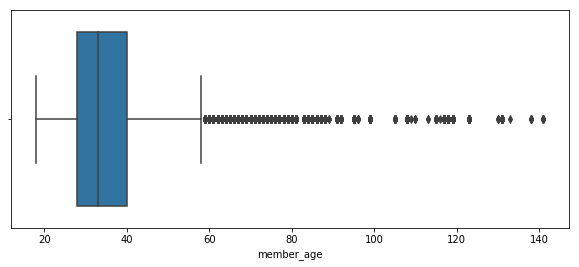

In [159]:
# code for the age boxplot

plt.figure(figsize = [10, 4])
base_color = sns.color_palette()[0]

sns.boxplot(data=df_clean, x='member_age', color=base_color);

In [160]:
df_clean.member_age.mean()

35.401120181668745

In [161]:
df_clean.member_age.describe(percentiles = [ .95])

count    2.570833e+06
mean     3.540112e+01
std      1.035694e+01
min      1.800000e+01
50%      3.300000e+01
95%      5.600000e+01
max      1.410000e+02
Name: member_age, dtype: float64

#### Define 
Remove age outliers. As mentioned in the Quality issues, there are customers with the birth year before 1900 thus customers with age above 100 years. As 95% of the users are below 56 , I am going to keep users below 60.

In [162]:
# Keep records below 60
df_clean = df_clean.query('member_age <=60')

#### Test

In [163]:
df_clean.describe()

duration_sec  end_station_latitude  end_station_longitude  \
count  2.510173e+06          2.510173e+06           2.510173e+06   
mean   7.636088e+02          3.776940e+01          -1.223508e+02   
std    1.881769e+03          1.425572e-01           3.481554e-01   
min    6.100000e+01          0.000000e+00          -1.224737e+02   
25%    3.410000e+02          3.777106e+01          -1.224108e+02   
50%    5.390000e+02          3.778107e+01          -1.223971e+02   
75%    8.350000e+02          3.779728e+01          -1.222902e+02   
max    8.628100e+04          3.788022e+01           0.000000e+00   

       member_birth_year  start_station_latitude  start_station_longitude  \
count       2.510173e+06            2.510173e+06             2.510173e+06   
mean        1.984366e+03            3.776954e+01            -1.223522e+02   
std         9.089714e+00            1.033814e-01             1.412643e-01   
min         1.959000e+03            0.000000e+00            -1.224737e+02   
25%         1.979000e+03            3.777106e+01            -1.224117e+02   
50%         1.986000e+03            3.778107e+01            -1.223974e+02   
75%         1.991000e+03            3.779728e+01            -1.222894e+02   
max         2.001000e+03            3.788022e+01             0.000000e+00   

         member_age     year_race  start_time_month  start_time_day  \
count  2.510173e+06  2.510173e+06      2.510173e+06    2.510173e+06   
mean   3.463418e+01  2.018324e+03      5.568170e+00    1.575147e+01   
std    9.089714e+00  4.680028e-01      3.335362e+00    8.752284e+00   
min    1.800000e+01  2.018000e+03      1.000000e+00    1.000000e+00   
25%    2.800000e+01  2.018000e+03      3.000000e+00    8.000000e+00   
50%    3.300000e+01  2.018000e+03      5.000000e+00    1.600000e+01   
75%    4.000000e+01  2.019000e+03      8.000000e+00    2.300000e+01   
max    6.000000e+01  2.019000e+03      1.200000e+01    3.100000e+01   

       start_time_hour  
count     2.510173e+06  
mean      1.353974e+01  
std       4.768417e+00  
min       0.000000e+00  
25%       9.000000e+00  
50%       1.400000e+01  
75%       1.700000e+01  
max       2.300000e+01

##### What is the structure of your dataset?
Originally there were approx. 2570833  bike rides that happen from 2017-04/2019 in the San Francisco Bay Area. The dataset contained features about:
Each trip is anonymized and includes:

Trip Duration (seconds), 
Start Time and Date, End Time and Date
Start Station ID, Start Station Name, Start Station Latitude ,Start Station Longitude
End Station ID ,End Station Name, End Station Latitude, End Station Longitude
Bike ID
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
Member Year of Birth

The dataset was further enhanced with features that I may find neccessary to perform interesting analysis:
rental time: month, day, hour of the day, weekday
customer: age
race year

### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out when and where bikes are high in demand (during the day/weekday/month). Moreover which age range and gender uses the service the most and if the service is mostly used by members or casual riders.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that the start time will be most exploited in my analysis as well as customer related data. I expect that location and datetime will have the strongest effect on bike demand.

# Univariate Exploration

I'll start by looking at the monthly trend of number of bike rentals and distribution of weekdays and hours of the day. I will also explore the duration of the trips

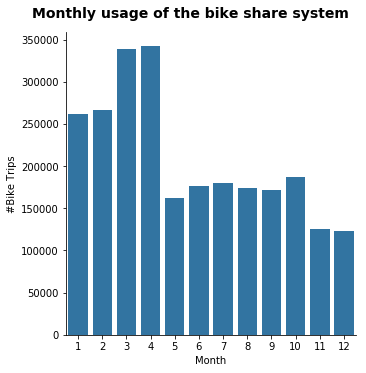

In [164]:
# monthly usege of the bike sharing system
g = sns.catplot(data=df_clean, x='start_time_month', kind='count', color = base_color)
g.set_axis_labels("Month", "#Bike Trips")
g.fig.suptitle('Monthly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');

Winter months are the worst for the bike sharing system most probably due to the weather conditions. The bike renting is high in demand between March & April, reaching its peak in April, followed by march

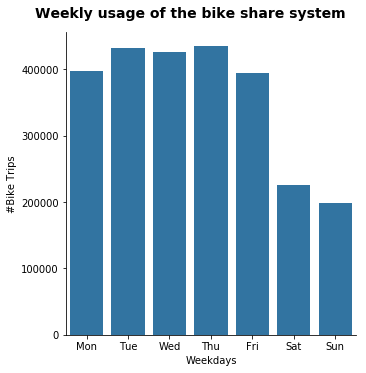

In [165]:
# weekday usege of the bike sharing system

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', kind='count', color = base_color, order = weekday)
g.set_axis_labels("Weekdays", "#Bike Trips")
g.fig.suptitle('Weekly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');


The bike share system is mainly used during weekdays, with Tuesday - Thursday as the most popular days for bike rides. The system is most probably used as a daily work/school commute.

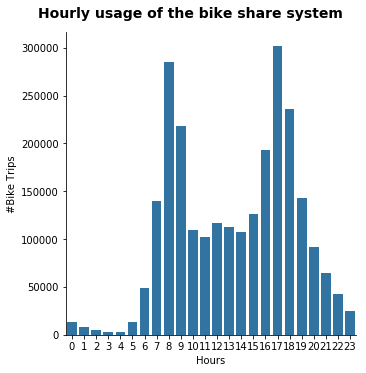

In [166]:
# hourly usege of the bike sharing system

g = sns.catplot(data=df_clean, x='start_time_hour', kind='count', color = base_color)
g.set_axis_labels("Hours", "#Bike Trips")
g.fig.suptitle('Hourly usage of the bike share system', y=1.03, fontsize=14, fontweight='semibold');


The hourly distribution is bimodal, the system is used mainly around 8-9am and 5-6pm when people get to and gat back from work.

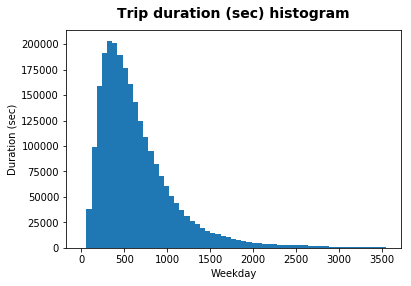

In [167]:
# code for the (histogram) duration (sec) distribution per user type

bin_edges = np.arange(0, 3600,60)

plt.hist(data = df_clean, x = 'duration_sec', bins = bin_edges)

plt.title("Trip duration (sec) histogram", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('Duration (sec)');


From the above graph we can see that trip durations are no longer than 30 min (1800 sec) and usually last 4 to 15 min. This can be explained by two facts:
The way the system works: single trips and 24h or 72h access pass are free of additional charge for trips up to 30 min, otherwise you pay extra $3 for additional 15 min. Only the monthly pass offers free of charge 45 min rides.
The way the system is used: as is looks like people use the system for commuting, they trips are usually short in time probably due to the closeness of their homes to workplace/school.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
There was one unusal points for the duration (sec), which in some cases lasted more than 24h. For the histogram I set the max range to 3600 sec = 60 min.

#### From the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was one unusal distribution for the member birth year, which in some cases was dated before 1900. Since 95% of the members are between 18 and 56 years, I removed users older than 60.

## Bivariate Exploration¶

In this section I will further explore the dataset by adding the customer type to the analysis.

In [168]:
# calculating % split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean['bike_id'].count()
subscriber_proportion = subscriber / df_clean['bike_id'].count()

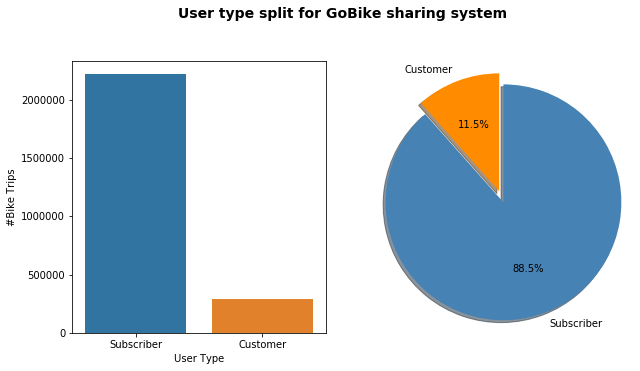

In [169]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');

The bike sharing system is mainly used by subscribers (88.5%) than ocassional riders (11.5%). 

Next I am going to explore the renting trends per each user type

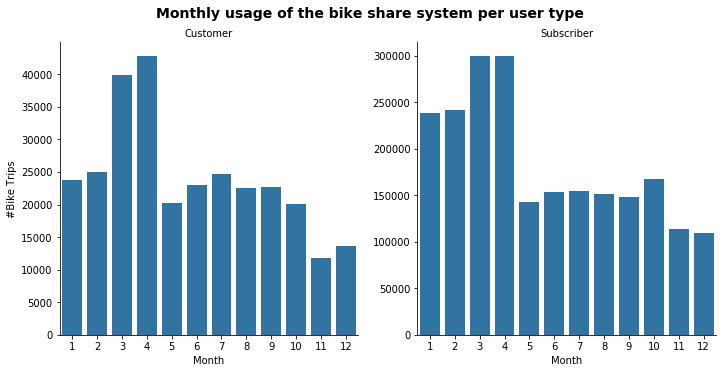

In [170]:
# monthly usege of the bike sharing system per user type
g = sns.catplot(data=df_clean, x='start_time_month', col="user_type", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Month", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

Winter months are the worst for the bike sharing system for both groups what can be determined by the harsher weather. 

For Customers, the bike renting is high in demand around summertime, reaching its peak in April

For Subscribers, the highest demand is in March and April. 

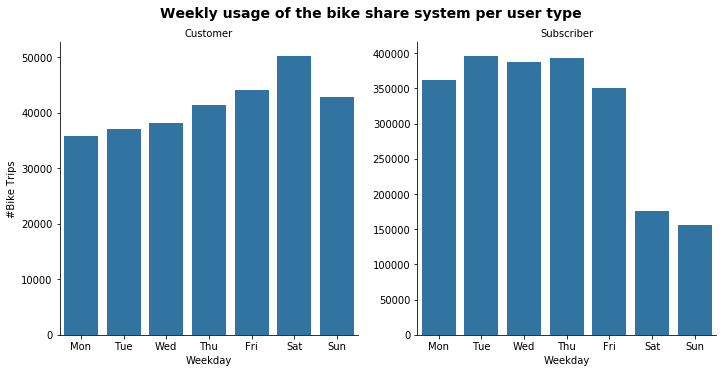

In [171]:
# weekday usege of the bike sharing system per user type

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False,
            color = base_color, order = weekday)
g.set_axis_labels("Weekday", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

Customers are most probably occasional riders and tourist who use the bike sharing system on holiday or weekend trips.
On the other hand, subscribers are most probably daily work/school commuters who use the system within a week. 

Next, I am going to check when within a day bikes are high in demand.

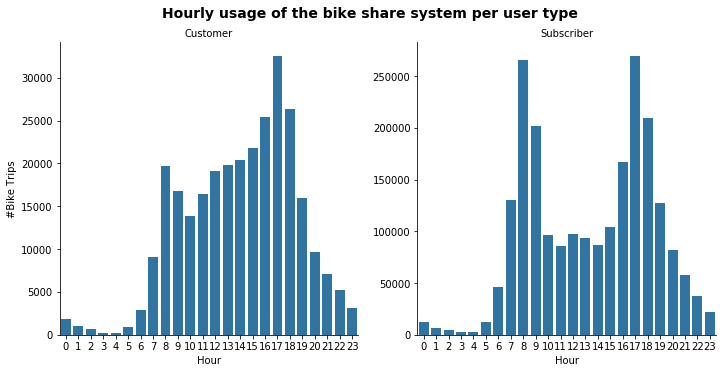

In [172]:
# hourly usage of the bike sharing system per user type

g = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', sharey = False,
            color = base_color)
g.set_axis_labels("Hour", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type', y=1.03, fontsize=14, fontweight='semibold');

There is also a different trend of when during the day bikes are rented most often. Customers use bikes mainly between 8am -  7 pm, reaching the renting peak around 5pm. Subscribers on the other side use the system at around 8-9am and 5-6pm when they go and come back from work. 

Next, I am going to check how the trip duration varies between customers and subscribers.

C:\Users\Anam\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


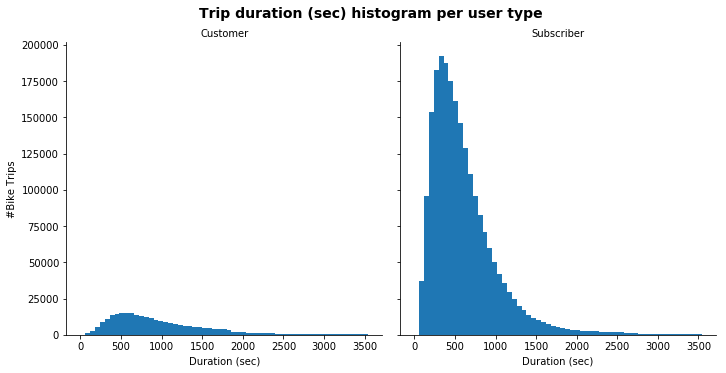

In [173]:
# code for the (histogram) duration (sec) distribution per user type

g = sns.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');

In [ ]:
# code for the (boxplot) duration (sec) distribution per user type

data = df_clean.query('duration_sec < 3600')
g = sns.catplot(data=data, y='duration_sec', col="user_type", kind='box',
            color = base_color)
g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Trip duration (sec)")
g.fig.suptitle('Trip duration (sec) boxplot per user type', y=1.03, fontsize=14, fontweight='semibold');

Looking at both charts (histograms and box plots), we can see that trip durations are longer for customers (9 to 23 minutes) than for subscribers (7 to 13 minutes). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

**Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?**

Adding the user type to the analysis depicted different usage behaviours between customers and subscribers. As mentioned above customers are casual riders, most probably tourists who rent bikes mainly in summertime (the peak in July), more often during weekends than weekdays and they rent bikes more often within the day rather than around commute hours (8-9am and 5-6pm). Subscribers are daily commuters, who also use the system around summertime, May-October (with the peak in October). They rent bikes more often during weekdays than weekends and mainly around the time they go and go back from work or school (8-9am and 5-6pm).

**Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?**

There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, what encourages longer trips around the area. Subscribers on the other hand use the system mainly for commute purposes so they rather prefer quick rides to and from work/school.

## Multivariate Exploration
In this section I will further explore the dataset by adding gender to the customer type and check the hourly distribution of bike rides during weekdays for customers and subscribers.

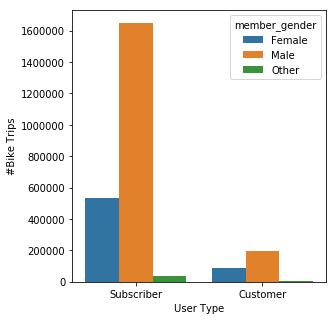

In [174]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", hue="member_gender", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips');

In general, males are using the system more often than females and others (the registration system allows you to choose 'Other' as a gender). However, the ratio is much smaller between males and females for customers (more ore less 2:1) than for subscribers (3:1). 

Let's explore if gender affects the way the bike system is used within a year, weekdays and hours of the day.

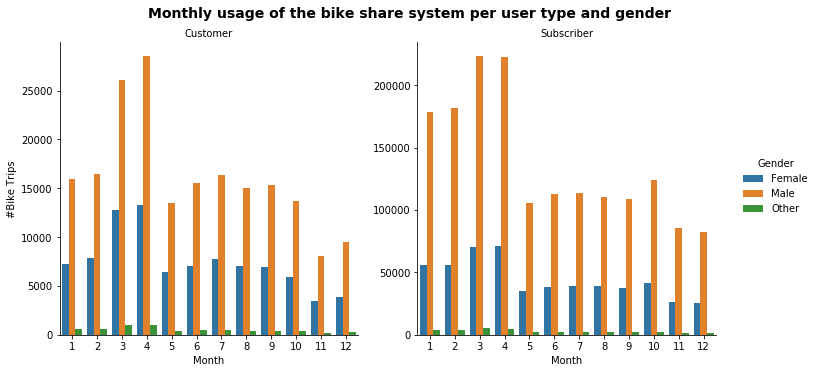

In [175]:
# monthly usege of the bike sharing system per user type and gender

g = sns.catplot(data=df_clean, x='start_time_month', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Month", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

The trend is very similar for males and females: for customers, the highest demand is around summertime, reaching its peak in July; for subscribers, the highest demand is from May till October, reaching it's peak in October. Suprisingly, for customers there are quite a lot of females using the system between January and March in comparison to males - the ratio is much smaller than for the rest of the year.

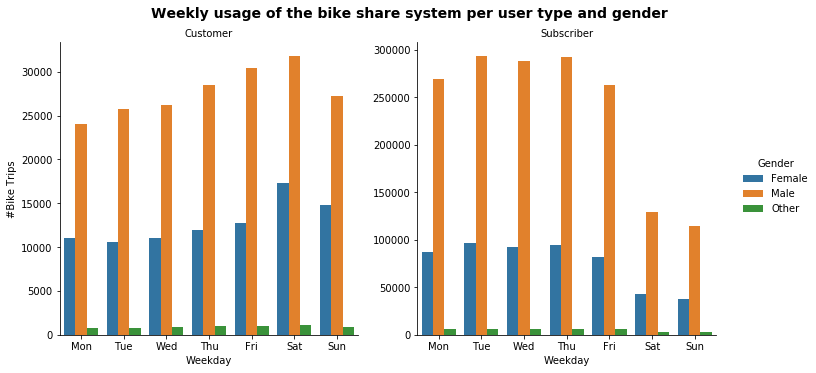

In [176]:
# weekday usege of the bike sharing system per user type and gender

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');


As in the previous section, the trend is very similar for males and females: customers use the system more often during weekends than within a week; subscribers use the system mainly within a week.

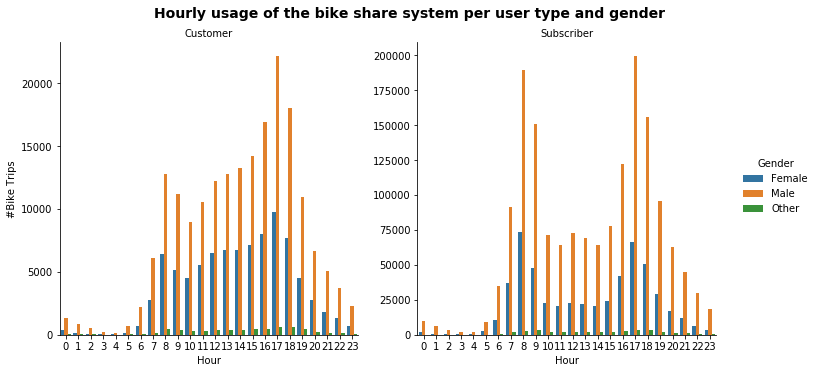

In [177]:
# hourly usage of the bike sharing system per user type and gender

g = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", hue='member_gender', kind='count', sharey = False)
g.set_axis_labels("Hour", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');


During the day, both males and females use the system the same way: customers use bikes mainly between 8 am - 7 pm; subscribers on the other side use the system at around 8-9am and 5-6pm when they go and come back from work.

C:\Users\Anam\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


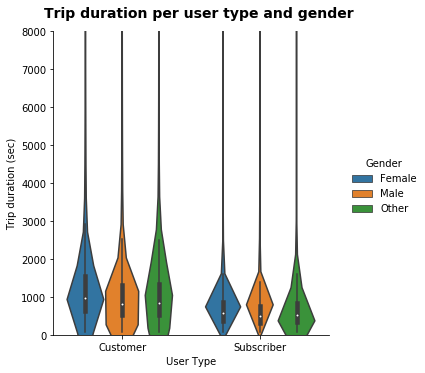

In [186]:
# code for the (violinplot) duration (sec) distribution per user type and gender

g = sns.catplot(data=df_clean, x='user_type', y="duration_sec", hue="member_gender", kind="violin")

g.set_axis_labels("User Type", "Trip duration (sec)")
g._legend.set_title('Gender')
g.ax.set(ylim=(0, 8000))
g.fig.suptitle('Trip duration per user type and gender', y=1.03, fontsize=14, fontweight='semibold');


Here we can observe that in both cases, females take longer trips (measured in time) than males and other. The difference is more visible for customers than for subscribers

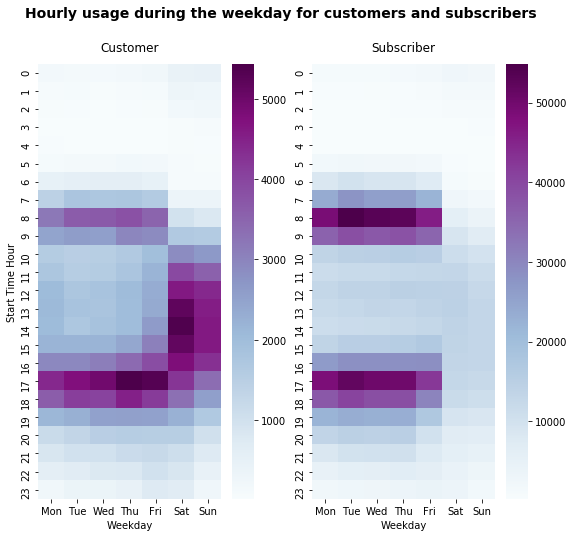

In [181]:
# Setting the weekday order
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

Customers use the bike sharing system more often on weekends:
weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on thursdays around 5pm
weekends: most bike rides happen between 11am - 6pm with the peak on Saturdays around 2pm

Subscribers use the bike sharing system mainly on weekdays:
weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Tuesdays around 8am
weekends: bikes are still rented but there is a significant drop in numbers of rented bikes throughout the entire weekends




**Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?**

Plotting a heatmap of when bikes are high in demand throughout the day on each weekday shed a new light on the customers behaviour. Plotting #bike trips throughout the day and #bike trips within the weekdays separately gave the impression that the demand for bikes is quite high throughout the day with a peak around 5pm which is not entirely true. The trend within weekdays for customers follows (although customers are rather not early birds) the one for subscribers who rent bikes mainly around commute hours (8-9am and 5-6pm). For customers, as depicted in univariate explorations, most of the trips happen on weekends but mainly between 10am - 8pm with the peak on Saturdays around 2pm, what was previosly not visible.

**Were there any interesting or surprising interactions between features?**

I have also checked if there is a trend difference for genders for each user group. There are not much of the differences in trends but surprisingly there are quite a lot of females using the system between January and April in comparison to males - the ratio (male:female) is much smaller than for the rest of the year. Moreover females take longer trips (measured in time) than males and others.